<a href="https://colab.research.google.com/github/vyshnav23/vyshnav_INFO5731_Spring2020/blob/master/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


1.1 I have used LDA model for extracting keywords for the from the abstracts, for using lda model intially we have to clean the data by removing the punctuations,special characters, numbers and convert into lower case , then perform stemming and lemmatization process. Then the corpus is converted into bag of words(bow) which is used as an input for the LDA model.

In [211]:
# Write your code here
# 1.2 collecting top 10 clusters from the entire corpus using LDA model
import pandas as pd
df1 = pd.read_csv('Abstracts Dataset.csv',encoding = "ISO-8859-1")
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
import gensim
nltk.download('stopwords')
nltk.download('wordnet')
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = stopwords.words('english')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
lmtzr = WordNetLemmatizer()





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [212]:
all_abs = ''.join(df1.Abstract.to_list())
all_abs

'The concept of maximum entropy can be traced back along multiple threads to Biblical times. Only recently, however, have computers become powerful enough to permit the widescale application of this concept to real world problems in statistical estimation and pattern recognition. In this paper we describe a method for statistical modeling based on maximum entropy. We present a maximum-likelihood approach for automatically constructing maximum entropy models and describe how to implement this approach efficiently, using as examples several problems in natural language processing.  In most natural language processing applications, Description Logics have been used to encode in a knowledge base some syntactic, semantic, and pragmatic elements needed to drive the semantic interpretation and the natural language generation processes. More recently, Description Logics have been used to fully characterise the semantic issues involved in the interpretation phase. In this Chapter the various pr

In [213]:
lda_pred = []
for i in [all_abs]:
    
    # clean and tokenize document string,removing stop words, stemming tokens and lemmatizing them
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    #stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    lmtzr_tokens = [lmtzr.lemmatize(word,'v') for word in stopped_tokens]
    texts = []
    # add tokens to list
    texts.append(lmtzr_tokens)

    # turn our tokenized documents into a id <-> term dictionary
    dictionary = corpora.Dictionary(texts)
        
    # convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in texts]

    # generate LDA model and displaying top 10 clusters
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10,id2word = dictionary, passes=20)
    lda_pred.append(ldamodel.print_topics())
    print(ldamodel.print_topics(num_words = 7))
    print()

[(0, '0.001*"language" + 0.001*"natural" + 0.001*"process" + 0.001*"nlp" + 0.001*"use" + 0.001*"information" + 0.001*"learn"'), (1, '0.001*"natural" + 0.001*"process" + 0.001*"language" + 0.001*"use" + 0.001*"nlp" + 0.001*"information" + 0.001*"approach"'), (2, '0.030*"language" + 0.026*"process" + 0.024*"natural" + 0.013*"use" + 0.012*"nlp" + 0.009*"information" + 0.008*"system"'), (3, '0.001*"language" + 0.001*"natural" + 0.001*"process" + 0.001*"use" + 0.001*"nlp" + 0.001*"system" + 0.001*"information"'), (4, '0.001*"language" + 0.001*"process" + 0.001*"natural" + 0.001*"use" + 0.001*"nlp" + 0.001*"learn" + 0.001*"model"'), (5, '0.001*"process" + 0.001*"language" + 0.001*"natural" + 0.001*"use" + 0.001*"nlp" + 0.001*"paper" + 0.001*"learn"'), (6, '0.001*"language" + 0.001*"natural" + 0.001*"process" + 0.001*"nlp" + 0.001*"information" + 0.001*"use" + 0.001*"learn"'), (7, '0.001*"language" + 0.001*"process" + 0.001*"natural" + 0.001*"nlp" + 0.001*"use" + 0.001*"information" + 0.001*"

In [214]:
topic_df = pd.DataFrame({'topics':ldamodel.print_topics(num_words = 8)})
print(topic_df.head())
topic_df.to_csv('topics.csv')

                                              topics
0  (0, 0.001*"language" + 0.001*"natural" + 0.001...
1  (1, 0.001*"natural" + 0.001*"process" + 0.001*...
2  (2, 0.030*"language" + 0.026*"process" + 0.024...
3  (3, 0.001*"language" + 0.001*"natural" + 0.001...
4  (4, 0.001*"language" + 0.001*"process" + 0.001...


1.3 Describing the topics base on keywords
1. Topic-1 - Use of natural process language in information systems.              
keywords - (language,process,natural,nlp,use,information,learn,system)
2. Topic-2 - Use of natural process language in information systems.  
keywords - (language,process,natural,use,nlp,information,system,learn)
3. Topic-3 - Natural Processing Language.        
keywords - (language,natural,use,process,information,system,learn,nlp) 
4. Topic-4 - Use of NLP Models.                          
keywords - (language,natural,process,use,nlp,information,model,system)
5. Topic-5 - Use of NLP system in Information Science.
keywords - (language,process,natural,use,nlp,system,information,knowledge)
6. Topic-6 - NLP Usage in learning information.          
keywords - (process,language,natural,nlp,use,information,learn,base)
7. topic-7 - Use of NLP systems in information retrieval.
keywords - (process,language,natural,use,nlp,system,base,information)
8. Topic-8 - Use of NLP in information learning models.
keywords - (language,natural,process,use,information,nlp,model,learn)
9. Topic-9 - NLP usage in machine learning.              
keywords - (language,process,natural,nlp,use,learn,system,word)
10. Topic-10 - Use of NLP in Information Systems.       
keywords - (language,process,natural,use,nlp,information,systems,system)

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

2.1 I am using bag of words(bow) and tf*idf features for the sentiment classification.
The bag-of-words model is a way of representing text data when modeling text with machine learning algorithms.This model is simple to understand and implement and has seen great success in problems such as language modeling and document classification.
In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. For the above reasons I have selected tf-idf and bag of words(bows) as features for sentiment classification.

In [0]:
# Write your code here
# 2.2 Using  Naive Bayes model and SVM Model to build sentiment classifiers respectively.
import csv
import re
import nltk
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import random
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, cross_val_score

#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('punkt')

In [216]:
df = pd.read_csv('Abstracts Dataset.csv',encoding = "ISO-8859-1")
df.head()

,Document_id,Abstract,Sentiment
0,1,The concept of maximum entropy can be traced b...,Neutral
1,2,In most natural language processing applicatio...,Positive
2,3,Introduction Statistical natural language pro...,Positive
3,4,Robots that interact with humans face-to-face ...,Positive
4,5,Natural languages are languages spoken by huma...,Negative


## Data Cleaning

In [217]:
len(df)

98

In [218]:
df.isnull().sum()

Document_id    0
Abstract       0
Sentiment      0
dtype: int64

In [219]:
blanks = []

for i,it,s,st in df.itertuples():
    if type(st)==str:
        if st.isspace():
            blanks.append(i)
            
print(len(blanks), 'blanks :' ,blanks)

0 blanks : []


In [220]:
# Removing special characters, numbers, stopwords,tokenization
df['Abstract'] = df['Abstract'].str.replace("[^a-zA-Z#]", " ")

stop = stopwords.words("english")
df['Abstract'] = df['Abstract'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['Abstract'] = df['Abstract'].apply(lambda x: word_tokenize(x))


df.head()

,Document_id,Abstract,Sentiment
0,1,"[The, concept, maximum, entropy, traced, back,...",Neutral
1,2,"[In, natural, language, processing, applicatio...",Positive
2,3,"[Introduction, Statistical, natural, language,...",Positive
3,4,"[Robots, interact, humans, face, face, using, ...",Positive
4,5,"[Natural, languages, languages, spoken, humans...",Negative


In [221]:
# lemmatization
lmtzr = WordNetLemmatizer()

df['Abstract'] = df['Abstract'].apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v') for word in x]))
df.head()

,Document_id,Abstract,Sentiment
0,1,The concept maximum entropy trace back along m...,Neutral
1,2,In natural language process applications Descr...,Positive
2,3,Introduction Statistical natural language proc...,Positive
3,4,Robots interact humans face face use natural l...,Positive
4,5,Natural languages languages speak humans Curre...,Negative


In [222]:
# Features Extraction
# Bag Of words Feature
bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(df['Abstract'])
bow.shape

(98, 1832)

In [223]:
# f-idf Feature
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(df['Abstract'])
tfidf.shape

(98, 1832)

## Building Models

In [224]:
# Naive Bayes Model
X_train, X_test, y_train, y_test = train_test_split(df['Abstract'], df['Sentiment'], random_state=42, test_size=0.20)

# create pipeline
pipeline_nb = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

pipeline_nb.fit(X_train, y_train)
predictions = pipeline_nb.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

[[ 0  1  2]
 [ 0 13  1]
 [ 0  2  1]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     Neutral       0.81      0.93      0.87        14
    Positive       0.25      0.33      0.29         3

    accuracy                           0.70        20
   macro avg       0.35      0.42      0.38        20
weighted avg       0.61      0.70      0.65        20

0.7


In [225]:
# SVM MODEL
X_train, X_test, y_train, y_test = train_test_split(df['Abstract'], df['Sentiment'], random_state=42, test_size=0.20)

# create pipeline
pipeline_svm = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

pipeline_svm.fit(X_train, y_train)
predictions = pipeline_svm.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

[[ 1  1  1]
 [ 0 12  2]
 [ 0  2  1]]
              precision    recall  f1-score   support

    Negative       1.00      0.33      0.50         3
     Neutral       0.80      0.86      0.83        14
    Positive       0.25      0.33      0.29         3

    accuracy                           0.70        20
   macro avg       0.68      0.51      0.54        20
weighted avg       0.75      0.70      0.70        20

0.7


2.3 comparison of accuracy, precision,recall,f-score between Naive Bayes Model and SVM Model.

Naive Bayes Model 

precision for negative-0.00,precision for neutral-0.81,precision for positive-0.25
recall for negative-0.00,recall for neutral-0.93,recall for positive-0.33,
F-1 Score for negative-0.00,F-1 Score for neutral-0.87,F-1 Score for positive-0.29,
accuracy- 0.70

SVM Model

precision for negative-1.00,precision for neutral-0.80,precision for positive-0.25
recall for negative-0.33,recall for neutral-0.86,recall for positive-0.33,
F-1 Score for negative-0.50,F-1 Score for neutral-0.83,F-1 Score for positive-0.29,
accuracy- 0.70.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [0]:
# Write your code here
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams.update({'font.size': 12})

In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [0]:
# Make column labels lowercase
train_df.columns = map(str.lower, train_df.columns)
test_df.columns = map(str.lower, test_df.columns)
# Replace spaces in columns with underscore
train_df.columns = train_df.columns.str.replace('\s+', '_')
test_df.columns = test_df.columns.str.replace('\s+', '_')

In [229]:
train_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [230]:
test_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [231]:
train_df.shape

(1460, 81)

In [232]:
# Set 'Id' column as index
train_df.set_index('id', inplace=True)
test_df.set_index('id', inplace=True)
# Drop 'pid' column if not needed

train_df.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [233]:
train_df.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'wo

In [234]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mssubclass     1460 non-null   int64  
 1   mszoning       1460 non-null   object 
 2   lotfrontage    1201 non-null   float64
 3   lotarea        1460 non-null   int64  
 4   street         1460 non-null   object 
 5   alley          91 non-null     object 
 6   lotshape       1460 non-null   object 
 7   landcontour    1460 non-null   object 
 8   utilities      1460 non-null   object 
 9   lotconfig      1460 non-null   object 
 10  landslope      1460 non-null   object 
 11  neighborhood   1460 non-null   object 
 12  condition1     1460 non-null   object 
 13  condition2     1460 non-null   object 
 14  bldgtype       1460 non-null   object 
 15  housestyle     1460 non-null   object 
 16  overallqual    1460 non-null   int64  
 17  overallcond    1460 non-null   int64  
 18  yearbuil

In [235]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mssubclass     1459 non-null   int64  
 1   mszoning       1455 non-null   object 
 2   lotfrontage    1232 non-null   float64
 3   lotarea        1459 non-null   int64  
 4   street         1459 non-null   object 
 5   alley          107 non-null    object 
 6   lotshape       1459 non-null   object 
 7   landcontour    1459 non-null   object 
 8   utilities      1457 non-null   object 
 9   lotconfig      1459 non-null   object 
 10  landslope      1459 non-null   object 
 11  neighborhood   1459 non-null   object 
 12  condition1     1459 non-null   object 
 13  condition2     1459 non-null   object 
 14  bldgtype       1459 non-null   object 
 15  housestyle     1459 non-null   object 
 16  overallqual    1459 non-null   int64  
 17  overallcond    1459 non-null   int64  
 18  yearb

In [0]:
# Convert 'MSSubClass' column to type(str)
train_df['mssubclass'] = train_df['mssubclass'].astype(str)
test_df['mssubclass'] = test_df['mssubclass'].astype(str)

In [238]:
train_df['mssubclass'].dtype

dtype('O')

In [240]:
# Create list of numeric columns
numeric_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)
tnumeric_columns = test_df.select_dtypes(include=[np.number]).columns.tolist()
print(tnumeric_columns)

['lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice']
['lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold']


In [241]:
# Print how many numeric columns so figure out plot grid
print('\n', len(numeric_columns), 'numerical columns')


 36 numerical columns


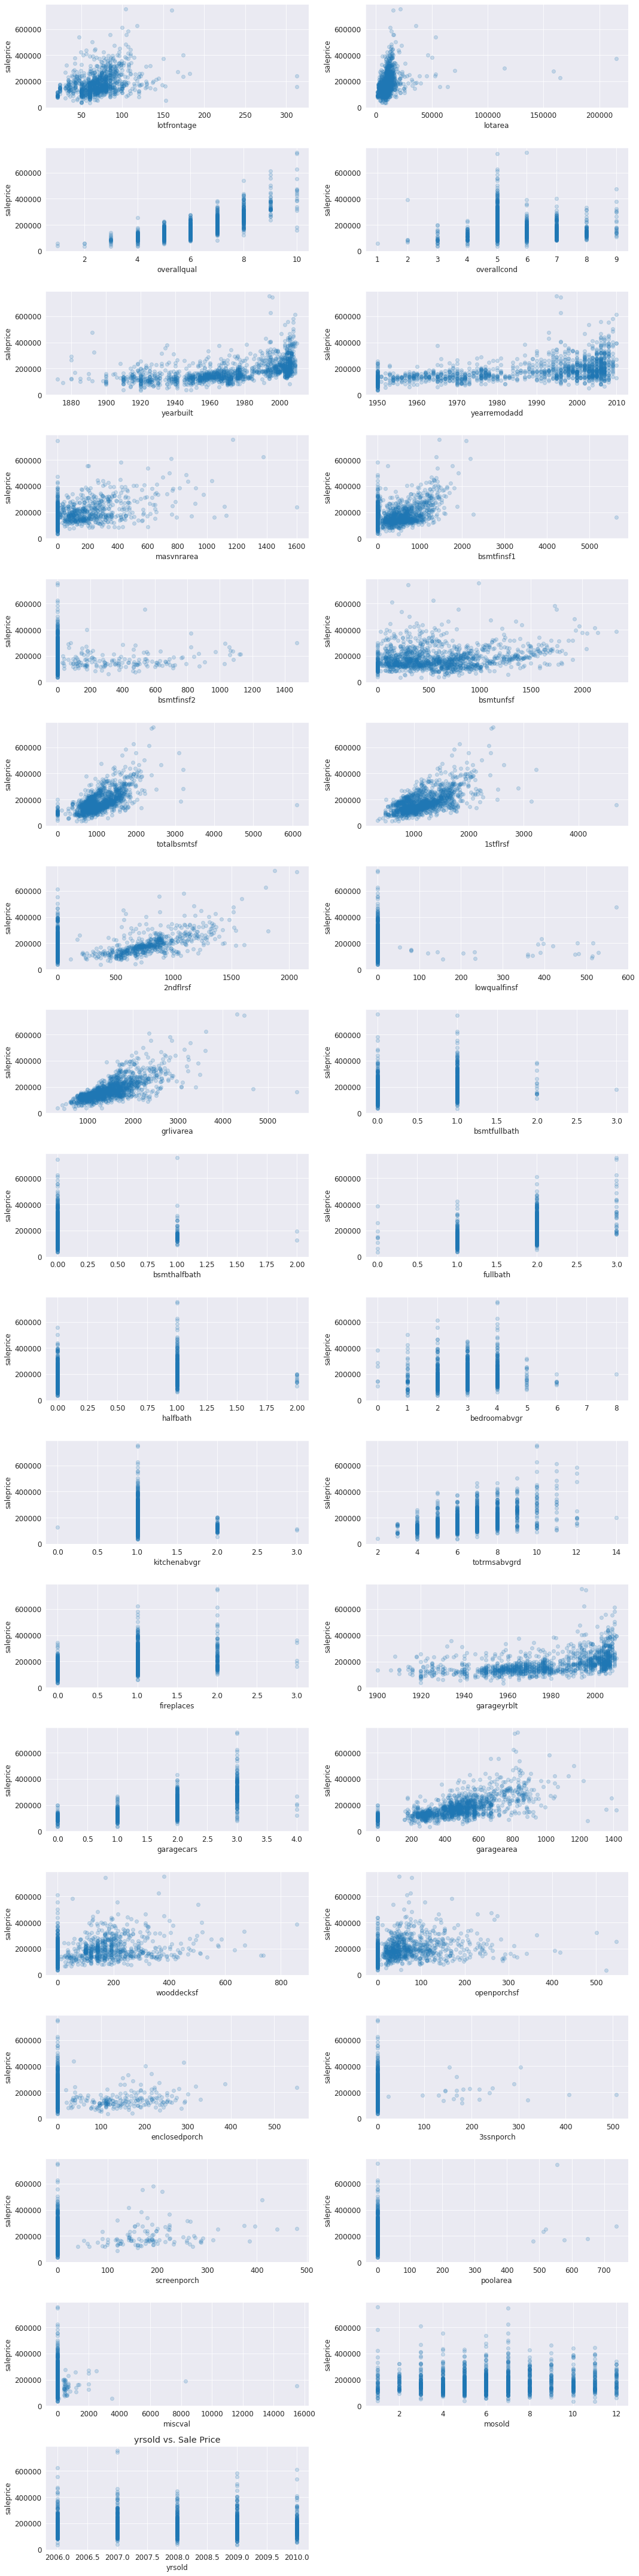

In [242]:
# Draw scatter plots of numerical columns
def draw_scatters(df, variables, n_rows, n_cols):
 fig=plt.figure(figsize=(15,60))
 for i, var_name in enumerate(variables):
   ax=fig.add_subplot(n_rows,n_cols,i+1)
   sns.regplot(x=var_name,y='saleprice',data=df,fit_reg=False, scatter_kws={'alpha':0.2})
 ax.set_title(var_name +" vs. Sale Price")
 fig.tight_layout()
 plt.show()
draw_scatters(train_df, numeric_columns[:-1], int(len(numeric_columns[:-1])/2)+1, 2)

In [243]:
df = pd.read_csv('test.csv')
df.shape

(1459, 80)

In [244]:
# Create list of categorical columns
cat_columns = train_df.select_dtypes(include=[object]).columns.tolist()
tcat_columns = test_df.select_dtypes(include=[object]).columns.tolist()
print(cat_columns)

['mssubclass', 'mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature', 'saletype', 'salecondition']


In [246]:
# Print how many categorical columns so figure out plot grid
print(len(cat_columns), 'categorical columns')

44 categorical columns


In [245]:
corr = train_df.corr()
corr['saleprice'].sort_values(ascending=False)


saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
1stflrsf         0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
2ndflrsf         0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
3ssnporch        0.044584
bsmtfinsf2      -0.011378
bsmthalfbath    -0.016844
miscval         -0.021190
lowqualfinsf    -0.025606
yrsold          -0.028923
overallcond     -0.077856
enclosedporch   -0.128578
kitchenabvgr    -0.135907
Name: saleprice, dtype: float64

#Preprocessing

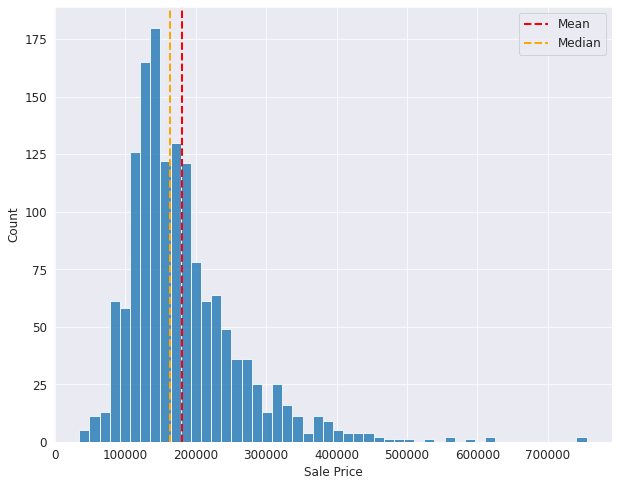

In [247]:
train_df['saleprice'].hist(bins=50, alpha=0.8)
plt.axvline(train_df['saleprice'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(train_df['saleprice'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.legend()
plt.show()

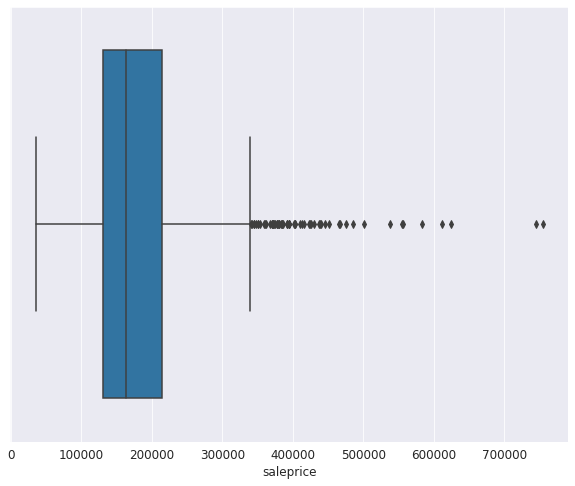

In [248]:
sns.boxplot(train_df['saleprice'], orient='h')
plt.show()

In [249]:
train_df['saleprice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

In [0]:
# Create function to reject outliers, default stdev is 1.5
def reject_outliers(data, m=1.5):
 return data[abs(data - np.mean(data)) < m * np.std(data)]

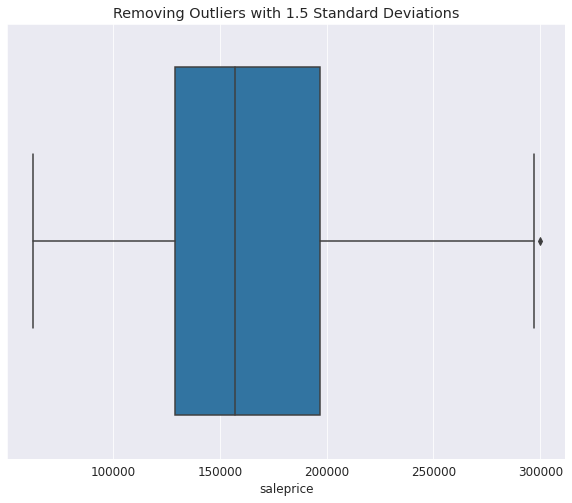

In [251]:
# Box plot showing the outliers gone away with m=1.5
sns.boxplot(reject_outliers(train_df['saleprice']),
 orient='h').set_title('Removing Outliers with 1.5 Standard Deviations')
plt.show()


In [252]:
# Make series of mask
mask = reject_outliers(train_df['saleprice']).tolist()
mask[0:20]

[208500,
 181500,
 223500,
 140000,
 250000,
 143000,
 200000,
 129900,
 118000,
 129500,
 144000,
 279500,
 157000,
 132000,
 149000,
 90000,
 159000,
 139000,
 139400,
 230000]

In [253]:
# Mask as Boolean
mask_results = train_df['saleprice'].isin(mask)[0:20].tolist()
mask_results

[True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [254]:
outliers_dict = dict(zip(mask, mask_results))
outliers_dict

{90000: True,
 118000: True,
 129500: True,
 129900: True,
 132000: True,
 139000: True,
 139400: True,
 140000: True,
 143000: True,
 144000: True,
 149000: True,
 157000: True,
 159000: True,
 181500: True,
 200000: False,
 208500: True,
 223500: True,
 230000: True,
 250000: True,
 279500: False}

In [255]:
# New dataframe based off mask
train_df = train_df[~train_df['saleprice'].isin(mask) == False]
train_df.head(20)

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [257]:

train_df['saleprice'].describe()

count      1330.000000
mean     165529.114286
std       50948.464069
min       62383.000000
25%      128912.500000
50%      157000.000000
75%      196875.000000
max      299800.000000
Name: saleprice, dtype: float64

In [258]:
# Columns with null (np.nan) values
nan_col_list = train_df.columns[train_df.isnull().any()].tolist()
nan_col_list


['lotfrontage',
 'alley',
 'masvnrtype',
 'masvnrarea',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'electrical',
 'fireplacequ',
 'garagetype',
 'garageyrblt',
 'garagefinish',
 'garagequal',
 'garagecond',
 'poolqc',
 'fence',
 'miscfeature']

In [260]:
tnan_col_list = test_df.columns[test_df.isnull().any()].tolist()
tnan_col_list

['mszoning',
 'lotfrontage',
 'alley',
 'utilities',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'masvnrarea',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfinsf1',
 'bsmtfintype2',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 'bsmtfullbath',
 'bsmthalfbath',
 'kitchenqual',
 'functional',
 'fireplacequ',
 'garagetype',
 'garageyrblt',
 'garagefinish',
 'garagecars',
 'garagearea',
 'garagequal',
 'garagecond',
 'poolqc',
 'fence',
 'miscfeature',
 'saletype']

In [261]:
# Sum of nan values of each column
nulls = train_df[nan_col_list].isnull().sum()
nulls

mszoning           0
lotfrontage      249
alley           1242
utilities          0
exterior1st        0
exterior2nd        0
masvnrtype         7
masvnrarea         7
bsmtqual          35
bsmtcond          35
bsmtexposure      36
bsmtfintype1      35
bsmtfinsf1         0
bsmtfintype2      36
bsmtfinsf2         0
bsmtunfsf          0
totalbsmtsf        0
bsmtfullbath       0
bsmthalfbath       0
kitchenqual        0
functional         0
fireplacequ      672
garagetype        72
garageyrblt       72
garagefinish      72
garagecars         0
garagearea         0
garagequal        72
garagecond        72
poolqc          1324
fence           1058
miscfeature     1278
saletype           0
dtype: int64

In [262]:
tnulls = test_df[tnan_col_list].isnull().sum()
tnulls

mszoning           4
lotfrontage      227
alley           1352
utilities          2
exterior1st        1
exterior2nd        1
masvnrtype        16
masvnrarea        15
bsmtqual          44
bsmtcond          45
bsmtexposure      44
bsmtfintype1      42
bsmtfinsf1         1
bsmtfintype2      42
bsmtfinsf2         1
bsmtunfsf          1
totalbsmtsf        1
bsmtfullbath       2
bsmthalfbath       2
kitchenqual        1
functional         2
fireplacequ      730
garagetype        76
garageyrblt       78
garagefinish      78
garagecars         1
garagearea         1
garagequal        78
garagecond        78
poolqc          1456
fence           1169
miscfeature     1408
saletype           1
dtype: int64

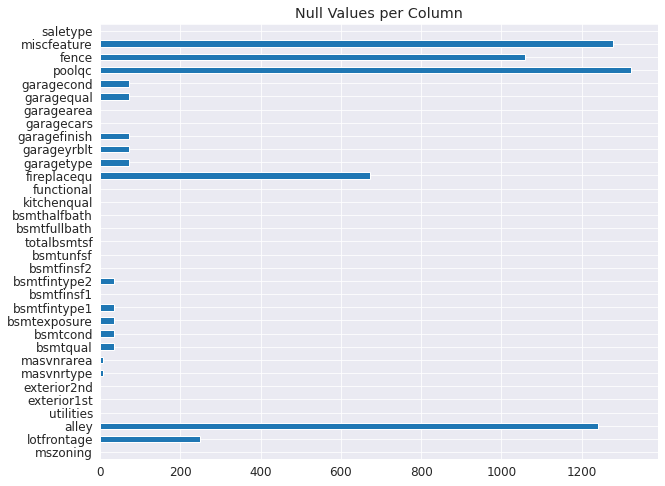

In [263]:
nulls.plot(kind='barh', title='Null Values per Column')
plt.show()

In [264]:
# Find how many missing values and percentage missing in each column
# This gives me an idea of priority
print('Missing data in each dataframe column:')
for col in train_df.columns:
 missing_data = len(train_df) - train_df[col].count()
 if (missing_data > 0 or missing_data =='NaN'):
  print(col, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(train_df))) * 
 100, 3)), '% of total')

Missing data in each dataframe column:
lotfrontage : 249 missing values is 18.722 % of total
alley : 1242 missing values is 93.383 % of total
masvnrtype : 7 missing values is 0.526 % of total
masvnrarea : 7 missing values is 0.526 % of total
bsmtqual : 35 missing values is 2.632 % of total
bsmtcond : 35 missing values is 2.632 % of total
bsmtexposure : 36 missing values is 2.707 % of total
bsmtfintype1 : 35 missing values is 2.632 % of total
bsmtfintype2 : 36 missing values is 2.707 % of total
electrical : 1 missing values is 0.075 % of total
fireplacequ : 672 missing values is 50.526 % of total
garagetype : 72 missing values is 5.414 % of total
garageyrblt : 72 missing values is 5.414 % of total
garagefinish : 72 missing values is 5.414 % of total
garagequal : 72 missing values is 5.414 % of total
garagecond : 72 missing values is 5.414 % of total
poolqc : 1324 missing values is 99.549 % of total
fence : 1058 missing values is 79.549 % of total
miscfeature : 1278 missing values is 96.

In [0]:
# Build a list of colums where NaN should be a string 'NA'
col_na = ['miscfeature',
 'fence',
 'poolqc',
 'garagecond',
 'garagequal',
 'garagefinish',
 'garagetype',
 'fireplacequ',
 'bsmtfintype1',
 'bsmtfintype2',
 'bsmtexposure',
 'alley']

In [266]:
train_df[col_na] = train_df[col_na].fillna('NA')
print(train_df.shape)
test_df[col_na] = test_df[col_na].fillna('NA')
train_df.head()

(1330, 80)


,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [0]:
def make_randoms(df, col):
 return np.random.normal(df[col].mean(),
 scale=df[col].std(),
 size=df[col].isnull().sum()).astype(int)

In [0]:
garage_yr_blt_rand = make_randoms(train_df,'garageyrblt')
garage_yr_blt_rand
tgarage_yr_blt_rand = make_randoms(test_df,'garageyrblt')

In [270]:
lot_frontage_rand = make_randoms(train_df,'lotfrontage')
lot_frontage_rand


array([ 66,  56,  62,  48,  90,  75,  58,  11,  77,  29,  79,  88,  60,
        51, 106,  65,  81,  83,  48,  43, 100,  75,  59,  48,  65,  94,
        68,  42,  33,  66,  88,  45,  52,  58,  81, 116,   3,  73,  78,
        61, 118,  39,  49,  88,  84,  46,  62,  48,   4, 136,  44,  12,
        61, 115,  44,  93,  46,  63,  80,  76,  76,  95, 105,  14,  47,
        70,  58, 101,  41,  53,  47,  67,  54,  60,  25,  39,  91,  43,
       171,  59,  66,  53, 108,  64,  28,  26,  57,  51, 101,  60,  85,
        79,  84,  66,  67,  56,  68,  62,  50,  62,  85, 113,  68,  87,
        55,  53,  81,  78,  10,  60,  82,  58,  64,  65,  64, 111,  96,
       121,  46,  53,  54, 120,  48, 124, 100,  96,  67,  88,  83,  49,
        85,  44,  50,  75,  20,  91,  59,  79,  66, 115,  27,  32,  51,
        29,  70, 107,  42, 102,  55,  39,  88,  36,  87,  57,  82,  78,
        29,  66,  94,  66,  42, 123, 107,  71,  88,  42,  51,  69,  67,
        30,  99,  80,  62,  63,  84,  95,  44,  83, 100,  86,  4

In [0]:
tlot_frontage_rand = make_randoms(test_df,'lotfrontage')

In [0]:
# Replace the NaNs 
train_df['lotfrontage'] = train_df['lotfrontage'].fillna('9999')
train_df['garageyrblt'] = train_df['garageyrblt'].fillna('9999')
train_df.loc[train_df['lotfrontage']=='9999','lotfrontage'] = lot_frontage_rand
train_df.loc[train_df['garageyrblt']=='9999','garageyrblt'] = garage_yr_blt_rand

In [273]:
# Drop the rest
print('Before: ', train_df.shape)
train_df = train_df.dropna()
print('After: ', train_df.shape)

Before:  (1330, 80)
After:  (1287, 80)


In [274]:
# Verify that all null values are gone
nan_col_list = train_df.columns[train_df.isnull().any()].tolist()
nan_col_list

[]

In [275]:
nan_col_list = train_df.columns[train_df.isnull().any()].tolist()
nulls = train_df[nan_col_list].isnull().sum()
nulls

Series([], dtype: float64)

In [0]:
# Replace the NaNs 
test_df['lotfrontage'] = test_df['lotfrontage'].fillna('9999')
test_df['garageyrblt'] = test_df['garageyrblt'].fillna('9999')
test_df.loc[test_df['lotfrontage']=='9999','lotfrontage'] = tlot_frontage_rand
test_df.loc[test_df['garageyrblt']=='9999','garageyrblt'] = tgarage_yr_blt_rand

In [277]:
# Drop the rest
print('Before: ', test_df.shape)
test_df = test_df.dropna()
print('After: ', test_df.shape)

Before:  (1459, 79)
After:  (1389, 79)


In [278]:
# Verify that all null values are gone
tnan_col_list = test_df.columns[test_df.isnull().any()].tolist()
tnan_col_list

[]

In [279]:
tnan_col_list = test_df.columns[test_df.isnull().any()].tolist()
tnulls = test_df[nan_col_list].isnull().sum()
tnulls

Series([], dtype: float64)

In [280]:
train_df.head(20)

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
8,60,RL,66,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NA,NA,NA,0,1,2008,WD,Normal,118000


In [281]:
# Re-index  so indices match 
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)
train_df.head(20)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,8,60,RL,66,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
7,9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
8,10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,...,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NA,NA,NA,0,1,2008,WD,Normal,118000
9,11,20,RL,70,11200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,...,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NA,Detchd,1965,Unf,1,384,TA

In [282]:
dummies_df = pd.get_dummies(train_df[cat_columns],prefix_sep='_',drop_first=False)
print(dummies_df.shape)
tdummies_df = pd.get_dummies(test_df[cat_columns],prefix_sep='_',drop_first=False)
dummies_df.head(20)

(1287, 271)


,mssubclass_120,mssubclass_160,mssubclass_180,mssubclass_190,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mszoning_C (all),mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Grvl,street_Pave,alley_Grvl,alley_NA,alley_Pave,lotshape_IR1,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_Bnk,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_AllPub,utilities_NoSeWa,lotconfig_Corner,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,...,garagequal_Po,garagequal_TA,garagecond_Ex,garagecond_Fa,garagecond_Gd,garagecond_NA,garagecond_Po,garagecond_TA,paveddrive_N,paveddrive_P,paveddrive_Y,poolqc_Ex,poolqc_Fa,poolqc_Gd,poolqc_NA,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,fence_NA,miscfeature_Gar2,miscfeature_NA,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [283]:
train_df = pd.concat([train_df, dummies_df], axis=1)
print(train_df.shape)
train_df.head(20)
test_df = pd.concat([test_df, tdummies_df], axis=1)

(1287, 352)


In [284]:
train_df.drop(cat_columns,axis=1,inplace=True)
test_df.drop(cat_columns,axis=1,inplace=True)
train_df.head()

,id,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,mssubclass_120,mssubclass_160,mssubclass_180,...,garagequal_Po,garagequal_TA,garagecond_Ex,garagecond_Fa,garagecond_Gd,garagecond_NA,garagecond_Po,garagecond_TA,paveddrive_N,paveddrive_P,paveddrive_Y,poolqc_Ex,poolqc_Fa,poolqc_Gd,poolqc_NA,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,fence_NA,miscfeature_Gar2,miscfeature_NA,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,1,65,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,80,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,68,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,60,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,84,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [285]:
from sklearn.model_selection import train_test_split 
X = train_df.drop('saleprice',axis=1)
y = train_df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
for dataset in [X_train, X_test, y_train, y_test]:
 print(dataset.shape)

(965, 307)
(322, 307)
(965,)
(322,)


In [0]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()
# fit_transform
X_train_scaled = scaler.fit_transform(X_train)
# transform
X_test_scaled = scaler.transform(X_test)

In [287]:
scaler.mean_[1]

68.95129533678757

In [288]:
scaler.scale_[1]

25.43965145590148

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [0]:
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)# Make predictions using the testing set
y_pred = regr.predict(X_test)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [294]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-1.59172430e+00  3.62003803e+01  6.50071836e-01  5.16643605e+03
  4.14068923e+03  3.16310712e+02  1.48236391e+02  6.54945116e+00
  1.18205521e+01  6.59087103e+00  2.47903925e+00  2.08904516e+01
  1.10562914e+01  2.78330961e+01 -8.17018080e+00  3.07191878e+01
  1.81540218e+03 -1.45834825e+03  9.76775342e+02  1.07677098e+03
  1.60255453e+03 -1.07914592e+04 -9.77806344e+02  6.79406867e+02
 -2.98558181e+01  2.87438622e+03  1.02672680e+01  1.21228580e+01
  1.61754539e+01  1.91384092e+01  4.53758096e+00  3.05473732e+01
  1.89096794e+02  4.03122295e+00  1.06559851e+02 -1.07204273e+02
 -4.62138457e+03 -1.65321615e+04 -3.69922514e+03 -3.19536019e+02
  5.24811688e+03  1.70648120e+03 -2.62727771e+03 -9.43776027e+03
  8.75921486e+03  4.48633477e+03  8.21351356e+03  1.11429128e+04
 -3.03357078e+03  4.18340053e+03 -3.46905865e+03 -2.49095867e+04
  1.67722454e+04  2.79405082e+03  7.15104527e+03 -1.80775478e+03
 -1.03524127e+04  1.03524127e+04 -2.41904853e+03  1.97055288e+02
  2.22199